In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import MCMT


In [3]:
def Initialize(QC, Qubits):
    for q in Qubits:
        QC.h(q)
    return QC

In [4]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    [qc.h(qubit) for qubit in range(nqubits)]
    [qc.x(qubit) for qubit in range(nqubits)]

    qc.h(nqubits - 1)
    qc.mct(list(range(nqubits - 1)), nqubits - 1)
    qc.h(nqubits - 1)

    [qc.x(qubit) for qubit in range(nqubits)]
    [qc.h(qubit) for qubit in range(nqubits)]

    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s



In [5]:
qc = QuantumCircuit(3)
qc.x(2)
qc = qc.compose(MCMT('cz', 2, 1, label=None))
qc.x(2)
oracle = qc.to_gate()
oracle.name = "U$_\omega$"

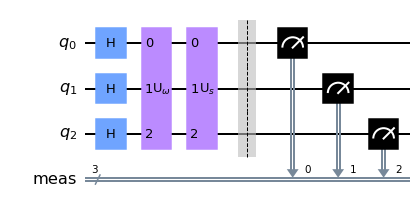

In [6]:
n = 3

grover_circuit = QuantumCircuit(n)
grover_circuit = Initialize(grover_circuit, [0, 1, 2])
grover_circuit.append(oracle, [0, 1, 2])
grover_circuit.append(diffuser(n), [0, 1, 2])
grover_circuit.measure_all()
grover_circuit.draw(output='mpl')

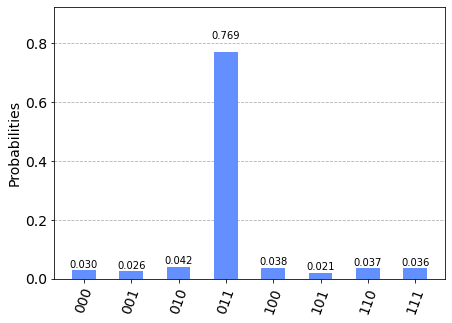

In [23]:
backend = Aer.get_backend("qasm_simulator")
results = execute(grover_circuit, backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)

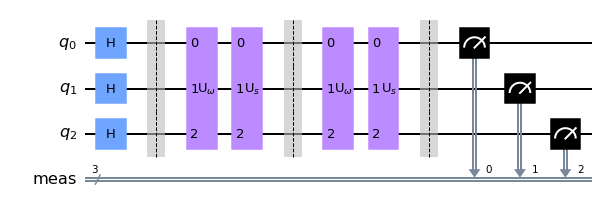

In [18]:
n = 3

grover_circuit = QuantumCircuit(n)
grover_circuit = Initialize(grover_circuit, [0, 1, 2])
grover_circuit.barrier()
grover_circuit.append(oracle, [0, 1, 2])
grover_circuit.append(diffuser(n), [0, 1, 2])
grover_circuit.barrier()
grover_circuit.append(oracle, [0, 1, 2])
grover_circuit.append(diffuser(n), [0, 1, 2])
grover_circuit.measure_all()
grover_circuit.draw(output='mpl')

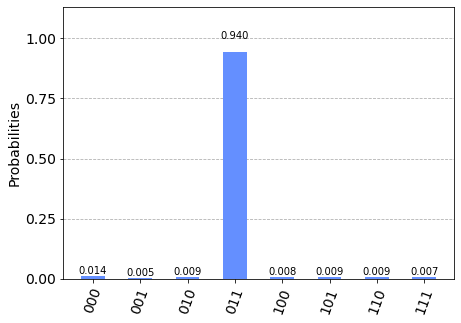

In [20]:
backend = Aer.get_backend("qasm_simulator")
results = execute(grover_circuit, backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)

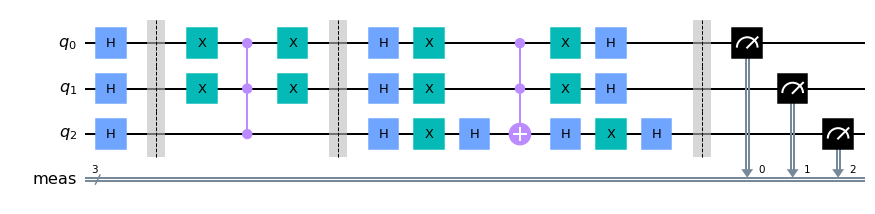

In [12]:
n = 3

open_circuit = QuantumCircuit(n)

# Initialization
[open_circuit.h(qubit) for qubit in range(n)]
open_circuit.barrier()

# Search solution = 110
"""open_circuit.x(2)
open_circuit = open_circuit.compose(MCMT('cz', 2, 1, label=None))
open_circuit.x(2)
open_circuit.barrier()"""

# Search solution = 001
open_circuit.x(0)
open_circuit.x(1)
open_circuit = open_circuit.compose(MCMT('cz', 2, 1, label=None))
open_circuit.x(0)
open_circuit.x(1)
open_circuit.barrier()

# Diffuser
[open_circuit.h(qubit) for qubit in range(n)]
[open_circuit.x(qubit) for qubit in range(n)]

open_circuit.h(n - 1)
open_circuit.mct(list(range(n - 1)), n - 1)
open_circuit.h(n - 1)

[open_circuit.x(qubit) for qubit in range(n)]
[open_circuit.h(qubit) for qubit in range(n)]


open_circuit.measure_all()

open_circuit.draw(output='mpl')

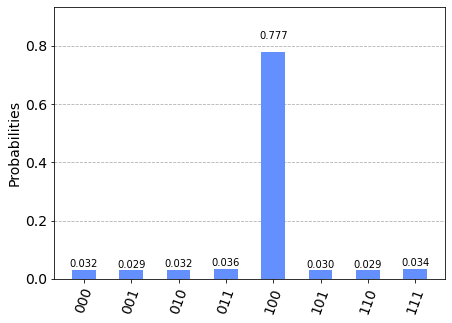

In [15]:
backend = Aer.get_backend("qasm_simulator")
results = execute(open_circuit, backend, shots=3000).result()
answer = results.get_counts()
plot_histogram(answer)

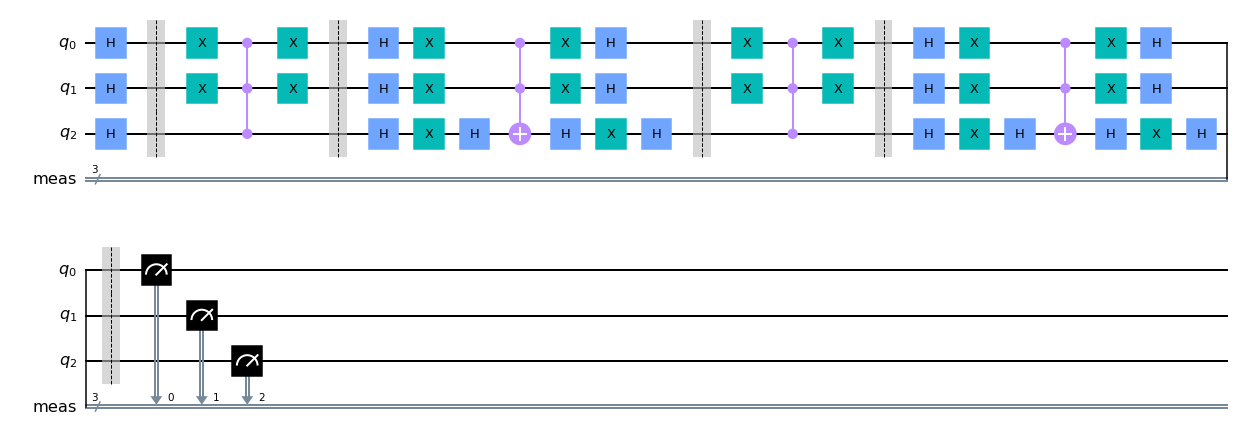

In [8]:
n = 3

open_circuit = QuantumCircuit(n)

# Initialization
[open_circuit.h(qubit) for qubit in range(n)]
open_circuit.barrier()

# Search solution = 110
"""open_circuit.x(2)
open_circuit = open_circuit.compose(MCMT('cz', 2, 1, label=None))
open_circuit.x(2)
open_circuit.barrier()"""

# Search solution = 001
open_circuit.x(0)
open_circuit.x(1)
open_circuit = open_circuit.compose(MCMT('cz', 2, 1, label=None))
open_circuit.x(0)
open_circuit.x(1)
open_circuit.barrier()

# Diffuser
[open_circuit.h(qubit) for qubit in range(n)]
[open_circuit.x(qubit) for qubit in range(n)]

open_circuit.h(n - 1)
open_circuit.mct(list(range(n - 1)), n - 1)
open_circuit.h(n - 1)

[open_circuit.x(qubit) for qubit in range(n)]
[open_circuit.h(qubit) for qubit in range(n)]
open_circuit.barrier()

# Search solution = 001
open_circuit.x(0)
open_circuit.x(1)
open_circuit = open_circuit.compose(MCMT('cz', 2, 1, label=None))
open_circuit.x(0)
open_circuit.x(1)
open_circuit.barrier()

# Diffuser
[open_circuit.h(qubit) for qubit in range(n)]
[open_circuit.x(qubit) for qubit in range(n)]

open_circuit.h(n - 1)
open_circuit.mct(list(range(n - 1)), n - 1)
open_circuit.h(n - 1)

[open_circuit.x(qubit) for qubit in range(n)]
[open_circuit.h(qubit) for qubit in range(n)]


open_circuit.measure_all()

open_circuit.draw(output='mpl')

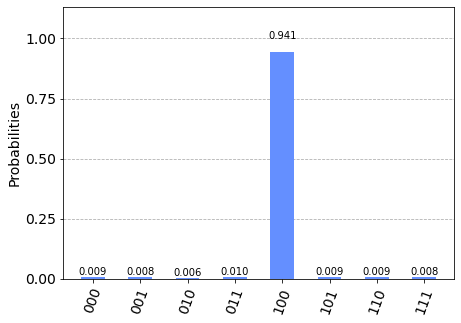

In [9]:
backend = Aer.get_backend("qasm_simulator")
results = execute(open_circuit, backend, shots=3000).result()
answer = results.get_counts()
plot_histogram(answer)

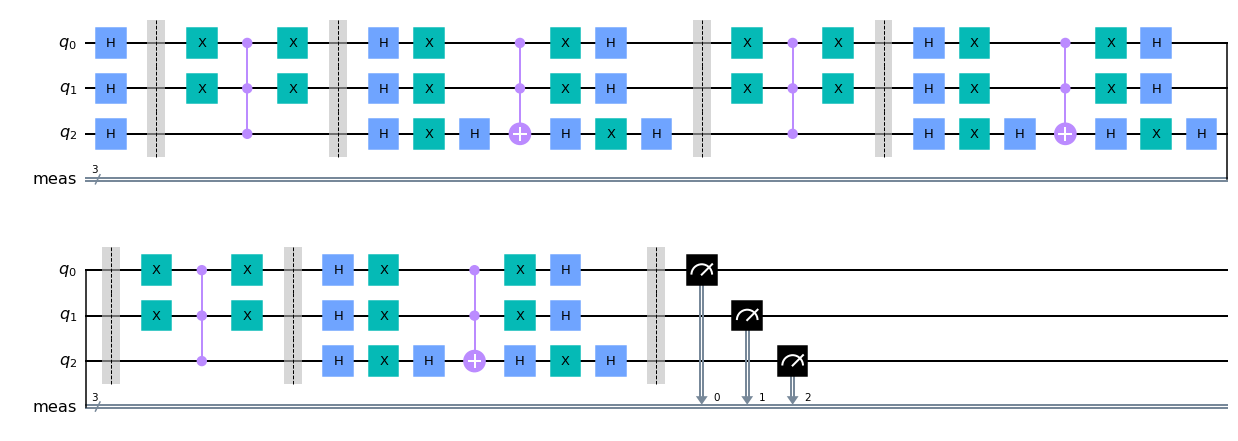

In [10]:
n = 3

open_circuit = QuantumCircuit(n)

# Initialization
[open_circuit.h(qubit) for qubit in range(n)]
open_circuit.barrier()

# Search solution = 110
"""open_circuit.x(2)
open_circuit = open_circuit.compose(MCMT('cz', 2, 1, label=None))
open_circuit.x(2)
open_circuit.barrier()"""

# Search solution = 001
open_circuit.x(0)
open_circuit.x(1)
open_circuit = open_circuit.compose(MCMT('cz', 2, 1, label=None))
open_circuit.x(0)
open_circuit.x(1)
open_circuit.barrier()

# Diffuser
[open_circuit.h(qubit) for qubit in range(n)]
[open_circuit.x(qubit) for qubit in range(n)]

open_circuit.h(n - 1)
open_circuit.mct(list(range(n - 1)), n - 1)
open_circuit.h(n - 1)

[open_circuit.x(qubit) for qubit in range(n)]
[open_circuit.h(qubit) for qubit in range(n)]
open_circuit.barrier()

# Search solution = 001
open_circuit.x(0)
open_circuit.x(1)
open_circuit = open_circuit.compose(MCMT('cz', 2, 1, label=None))
open_circuit.x(0)
open_circuit.x(1)
open_circuit.barrier()

# Diffuser
[open_circuit.h(qubit) for qubit in range(n)]
[open_circuit.x(qubit) for qubit in range(n)]

open_circuit.h(n - 1)
open_circuit.mct(list(range(n - 1)), n - 1)
open_circuit.h(n - 1)

[open_circuit.x(qubit) for qubit in range(n)]
[open_circuit.h(qubit) for qubit in range(n)]
open_circuit.barrier()

# Search solution = 001
open_circuit.x(0)
open_circuit.x(1)
open_circuit = open_circuit.compose(MCMT('cz', 2, 1, label=None))
open_circuit.x(0)
open_circuit.x(1)
open_circuit.barrier()

# Diffuser
[open_circuit.h(qubit) for qubit in range(n)]
[open_circuit.x(qubit) for qubit in range(n)]

open_circuit.h(n - 1)
open_circuit.mct(list(range(n - 1)), n - 1)
open_circuit.h(n - 1)

[open_circuit.x(qubit) for qubit in range(n)]
[open_circuit.h(qubit) for qubit in range(n)]


open_circuit.measure_all()

open_circuit.draw(output='mpl')

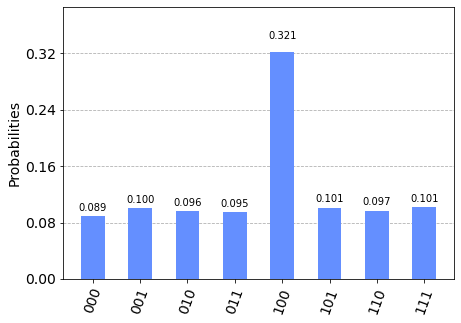

In [11]:
backend = Aer.get_backend("qasm_simulator")
results = execute(open_circuit, backend, shots=3000).result()
answer = results.get_counts()
plot_histogram(answer)